In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



Loading the Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

model_path = "/content/drive/MyDrive/trained_model.keras"
model = load_model(model_path)

# Check if the model is loaded correctly
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      12,289,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,117,526 (130.15 MB)

 Trainable params: 17,058,762 (65.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,058,764 (65.07 MB)

In [ ]:
!ls "/content/drive/MyDrive/dataset/test/test/test"



AppleCedarRust1.JPG  CornCommonRust3.JPG     TomatoEarlyBlight2.JPG  TomatoYellowCurlVirus1.JPG
AppleCedarRust2.JPG  PotatoEarlyBlight1.JPG  TomatoEarlyBlight3.JPG  TomatoYellowCurlVirus2.JPG
AppleCedarRust3.JPG  PotatoEarlyBlight2.JPG  TomatoEarlyBlight4.JPG  TomatoYellowCurlVirus3.JPG
AppleCedarRust4.JPG  PotatoEarlyBlight3.JPG  TomatoEarlyBlight5.JPG  TomatoYellowCurlVirus4.JPG
AppleScab1.JPG	     PotatoEarlyBlight4.JPG  TomatoEarlyBlight6.JPG  TomatoYellowCurlVirus5.JPG
AppleScab2.JPG	     PotatoEarlyBlight5.JPG  TomatoHealthy1.JPG      TomatoYellowCurlVirus6.JPG
AppleScab3.JPG	     PotatoHealthy1.JPG      TomatoHealthy2.JPG
CornCommonRust1.JPG  PotatoHealthy2.JPG      TomatoHealthy3.JPG
CornCommonRust2.JPG  TomatoEarlyBlight1.JPG  TomatoHealthy4.JPG


In [128]:
import cv2
imagePath="/content/drive/MyDrive/Our Dataset/potato2.jpg"

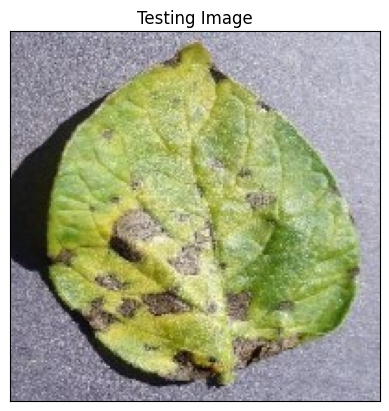

In [129]:
img = cv2.imread(imagePath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   #convert BGR to RGB
# img = cv2.resize(img, (256, 256))

plt.imshow(img)
plt.title("Testing Image")
plt.xticks([])
plt.yticks([])
plt.show()

# Testing the Model

In [130]:
img = tf.keras.preprocessing.image.load_img(imagePath, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(img)
input_arr = np.array([input_arr]) # To convert single image to Batch
print(input_arr.shape)

(1, 128, 128, 3)


In [131]:
prediction=model.predict(input_arr)
prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


(1, 38)

In [132]:
result_index = np.argmax(prediction)
result_index

np.int64(20)

In [133]:
class_names=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [134]:
model_prediction = class_names[result_index]
model_prediction

'Potato___Early_blight'

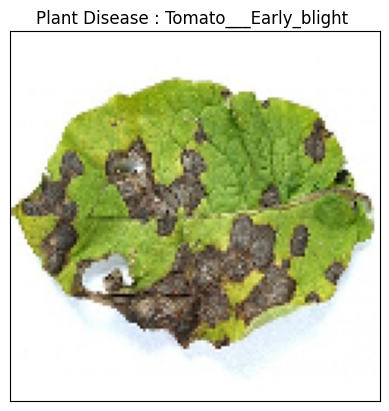

In [127]:

plt.imshow(img)
plt.title(f"Plant Disease : {model_prediction} ")
plt.xticks([])
plt.yticks([])
plt.show()